<a href="https://colab.research.google.com/github/charann90/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Sharing Demand Prediction- Bike Sharing Dremand prediction**

**Project Type**- Regression

**Contribution** 
1. Name-Charan C S 

   Email- ccharancs543@gmail.com

   contribution- Collab Notebook, Presentation, Summary
2. Name-Saraswat Mukherjee

   Email- mae21saraswat@gmail.com 
  
   Contribution- Technical documentation, Summary



#**Github**

https://github.com/charann90/Bike-Sharing-Demand-Prediction.git

# **Project Summary -**

The goal of this project is to train a model that can predict the number of bike rentals based on weather conditions, for any given hour of the year. The dataset used in the project was obtained from the Capital Bikeshare program in Washington, D.C., and it includes historical bike usage patterns and weather data spanning over two years.
Bike sharing systems provide a method for renting bicycles that is automated through a network of kiosk locations throughout a city. This includes obtaining membership, rental, and returning the bike.

The given data set contains 8760 entries and 13 columns. Season, holiday, working day columns are categorical. Rest all except ‘datetime’ are numerical columns.

The dataset had no missing values. In the data cleaning process, we removed some
columns and transformed all categorical variables into dummy variables through
encoding. During the analysis, outliers were identified in the dataset. To prevent the effect of outliers on the prediction model, the features 'rainfall' and 'snowfall', which had the highest number of outliers, were removed. Additionally, to reduce the impact of outliers, the outlier values were replaced with the nearest quantile values.

To determine the optimal independent variable for the regression analysis, different metrics and algorithms were utilized. In this case, the models with the highest R Squared and Adjusted R squared values were selected as they provide a good measure of the proportion of variance in the dependent variable that can be explained by the independent variable.

During exploratory data analysis (EDA), we investigated the demand for bikes across different seasons. This involved plotting the monthly bike rentals and visualizing the average bike rentals per hour. Additionally, we created a heat map to visualize the correlation between the features and analysed the relationship between temperature and bike rentals and plotting the scatter plot to know the flow value. To understand the frequency distribution of the numerical features, we plotted a distribution plot. Finally, we plotted the importance of the features for predicting bike rentals.

To predict the number of bike rentals, several machine learning algorithms were
utilized, including linear regression, lasso regression, ridge regression, decision tree, random forest, K-Nearest Neighbour (KNN), and Support Vector Machine (SVM). To identify the optimal model, hyperparameter tuning and cross-validation techniques were applied.

Based on the evaluation metrics, the random forest model had the best performance, achieving an R-squared score of 0.8449, followed by the decision tree regression model. In contrast, the SVM model had the poorest performance with an R-squared score of -4.11. Lasso and Ridge regression were not effective in achieving high scores. Through feature importance analysis, we found that temperature, hour, and humidity were the most significant features that positively influenced the total rented bike count.

# Problem statement

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes

**Data description**

*Date : year-month-day*

*Rented Bike count - Count of bikes rented at each hour*

*Hour - Hour of he day*

*Temperature-Temperature in Celsius*

*Humidity - %*

*Windspeed - m/s*

*Visibility - 10m*

*Dew point temperature - Celsius*

*Solar radiation - MJ/m2*

*Rainfall - mm*

*Snowfall - cm*

*Seasons - Winter, Spring, Summer, Autumn*

*Holiday - Holiday/No holiday*

*Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)*



# libraries

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV,RidgeCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Data uploading

In [ ]:
df=pd.read_csv('/content/SeoulBikeData.csv',encoding= 'unicode_escape')
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


# Data Wrangling

# Data Understanding

In [ ]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#understanding the statistical information
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Data cleaning

In [ ]:
#checking null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no null values present

In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#creating seperating columns for year and month
df['month']=pd.DatetimeIndex(df['Date']).month
df['year']=pd.DatetimeIndex(df['Date']).year

In [ ]:
#dropping date column
df.drop('Date',axis=1,inplace=True)

In [ ]:
#listing all the categorical columns
categorical_col=['Seasons','Holiday','Functioning Day']

# EDA

## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**Bike rentals for different Seasons**

In [ ]:
#creating a variable for grouping rented bike count with the season bookings
season_count=pd.DataFrame(df.groupby(['Seasons'])['Rented Bike Count'].sum())
season_count.rename({'index':'season','Seasons':'total bike rent'})

,Rented Bike Count
Seasons,
Autumn,1790002
Spring,1611909
Summer,2283234
Winter,487169


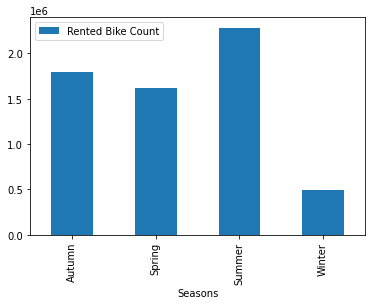

In [ ]:
#plotting the sum of rentals in different seasons
season_count.plot(kind='bar')

*   The use rental bikes is high in summer and low in winter

**Funtioning day**

In [ ]:
#creating a variable for grouping rented bike count with the funtioning day bookings
workingday_count=pd.DataFrame(df.groupby(['Functioning Day'])['Rented Bike Count'].sum())
workingday_count.rename({'index':'functioning day','Seasons':'total bike rent'})

,Rented Bike Count
Functioning Day,
No,0
Yes,6172314


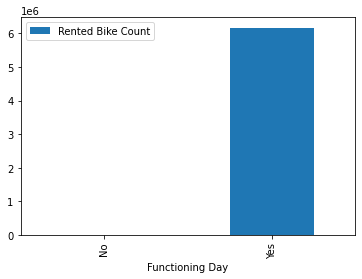

In [ ]:
#plotting the above dataframe 
workingday_count.plot(kind='bar')

*   There are no renting bikes during non functioning days and hence there is extremely low demand during non working days

**Holiday rental**

In [ ]:
#creating a variable for grouping rented bike count with the funtioning day bookings
holiday_count=pd.DataFrame(df.groupby(['Holiday'])['Rented Bike Count'].sum())
holiday_count.rename({'index':'holiday','Seasons':'total bike rent'})

,Rented Bike Count
Holiday,
Holiday,215895
No Holiday,5956419


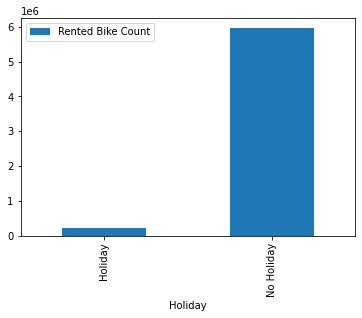

In [ ]:
#plotting the sum of rentals during holidays and non holidays
holiday_count.plot(kind='bar')

*   The use of rental bikes is extremely low when there is a holiday


In [ ]:
#creatinhg a function to plot the frequency distributions of categorical columns
'''def category(col):
  for i in categorical_col:
    plt.figure(figsize=(10,5))
    df[i].value_counts().head(10).plot(kind='bar')  
    plt.title(f'{i}') 
    plt.show()'''

"def category(col):\n  for i in categorical_col:\n    plt.figure(figsize=(10,5))\n    df[i].value_counts().head(10).plot(kind='bar')  \n    plt.title(f'{i}') \n    plt.show()"

**Yearly bookings**

In [ ]:
#rental per year
year_sales=df.groupby(['year'])['Rented Bike Count'].sum()
year_sales

year
2017     185330
2018    5986984
Name: Rented Bike Count, dtype: int64

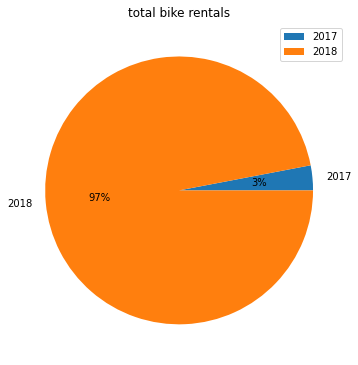

In [ ]:
#plotting the yearly sales in pie plot
plt.figure(figsize=(6,7))
plt.pie(year_sales,labels=['2017','2018'],autopct='%1.0f%%')
plt.title('total bike rentals')
plt.legend()
plt.show()


*   The are very low bike rentals in 2017 compared to 2018 

*   2018 bike rentals constitutes 97% of the total rentals



**Rentals per month**

In [ ]:
#sales for different months
month_sales=pd.DataFrame(df.groupby(['month','year'])['Rented Bike Count'].sum().sort_values(ascending=False)).reset_index()
month_sales

,month,year,Rented Bike Count
0,6,2018,700059
1,7,2018,682790
2,5,2018,657641
3,10,2018,623535
4,8,2018,606158
5,4,2018,547490
6,9,2018,492093
7,11,2018,487564
8,3,2018,447815
9,1,2018,277705


In [ ]:
#defining seperate varible for both the years
year1= pd.DataFrame(month_sales[month_sales['year']==2017])
year2= pd.DataFrame(month_sales[month_sales['year']==2018])

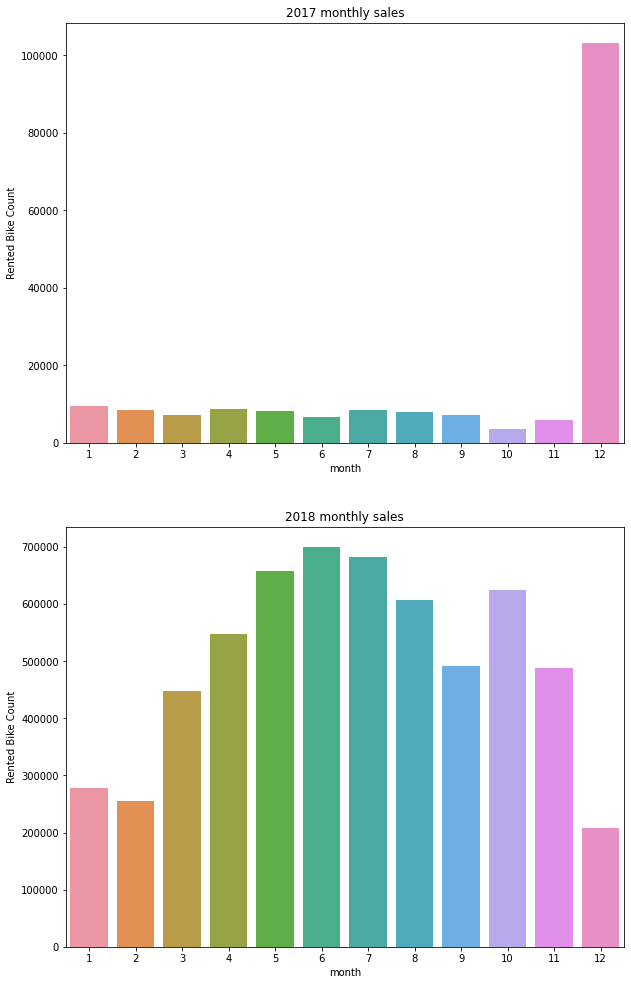

In [ ]:
#plotting monthly rentals for both the years 
fig= plt.figure(figsize=(10,17))
axs=fig.add_subplot(2,1,1)
sns.barplot(data=year1,x='month',y='Rented Bike Count',ax=axs)
plt.title('2017 monthly sales')

axs=fig.add_subplot(2,1,2)
sns.barplot(data=year2,x='month',y='Rented Bike Count',ax=axs)
plt.title('2018 monthly sales')

plt.show()



* In 2017 december month has highest bike rentals 


* In 2018 june month has highest bike rentals and december has least rentals







In [ ]:
#sales in different hours
hour_sales=pd.DataFrame(df.groupby(['Hour'])['Rented Bike Count'].sum().sort_values(ascending=False))
hour_sales.head()

,Rented Bike Count
Hour,
18,548568
19,436229
17,415556
20,390172
21,376479


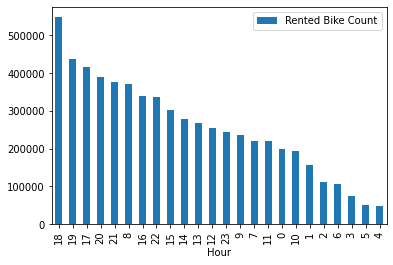

In [ ]:
hour_sales.plot(kind='bar')



*   From 6 pm to 9 pm there is huge demand for bike rentals 

---






# Temperature

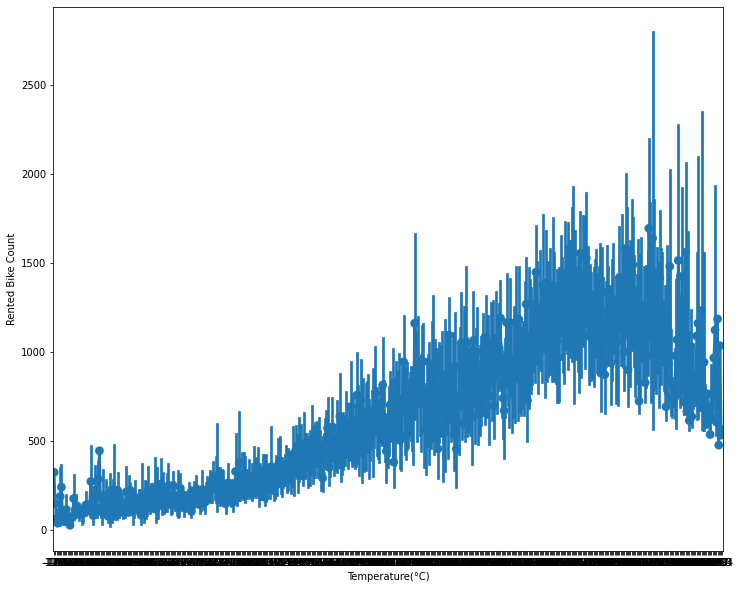

In [ ]:
fig= plt.figure(figsize=(12,10))
sns.pointplot(data=df,x='Temperature(°C)',y='Rented Bike Count')
plt.show()

In [ ]:
#plotting sales in diffrent hours for functioning day
fig= plt.figure(figsize=(12,10))
group_work_hour = pd.DataFrame(df.groupby(['Functioning Day', 'Hour'])['Rented Bike Count'].sum()).reset_index()
sns.pointplot(data=group_work_hour,x='Hour',y='Rented Bike Count',hue='Functioning Day')
plt.title('number of sales in different hours')
plt.show()

In [ ]:
#plotting sales in diffrent hours in holidays 
fig= plt.figure(figsize=(12,10))
group_work_hour = pd.DataFrame(df.groupby(['Holiday', 'Hour'])['Rented Bike Count'].sum()).reset_index()
sns.pointplot(data=group_work_hour,x='Hour',y='Rented Bike Count',hue='Holiday')
plt.title('number of sales in different hours while having holiday')
plt.show()

In [ ]:
#listing all the numerical columns
num_col=pd.DataFrame(df[['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)']])
                    

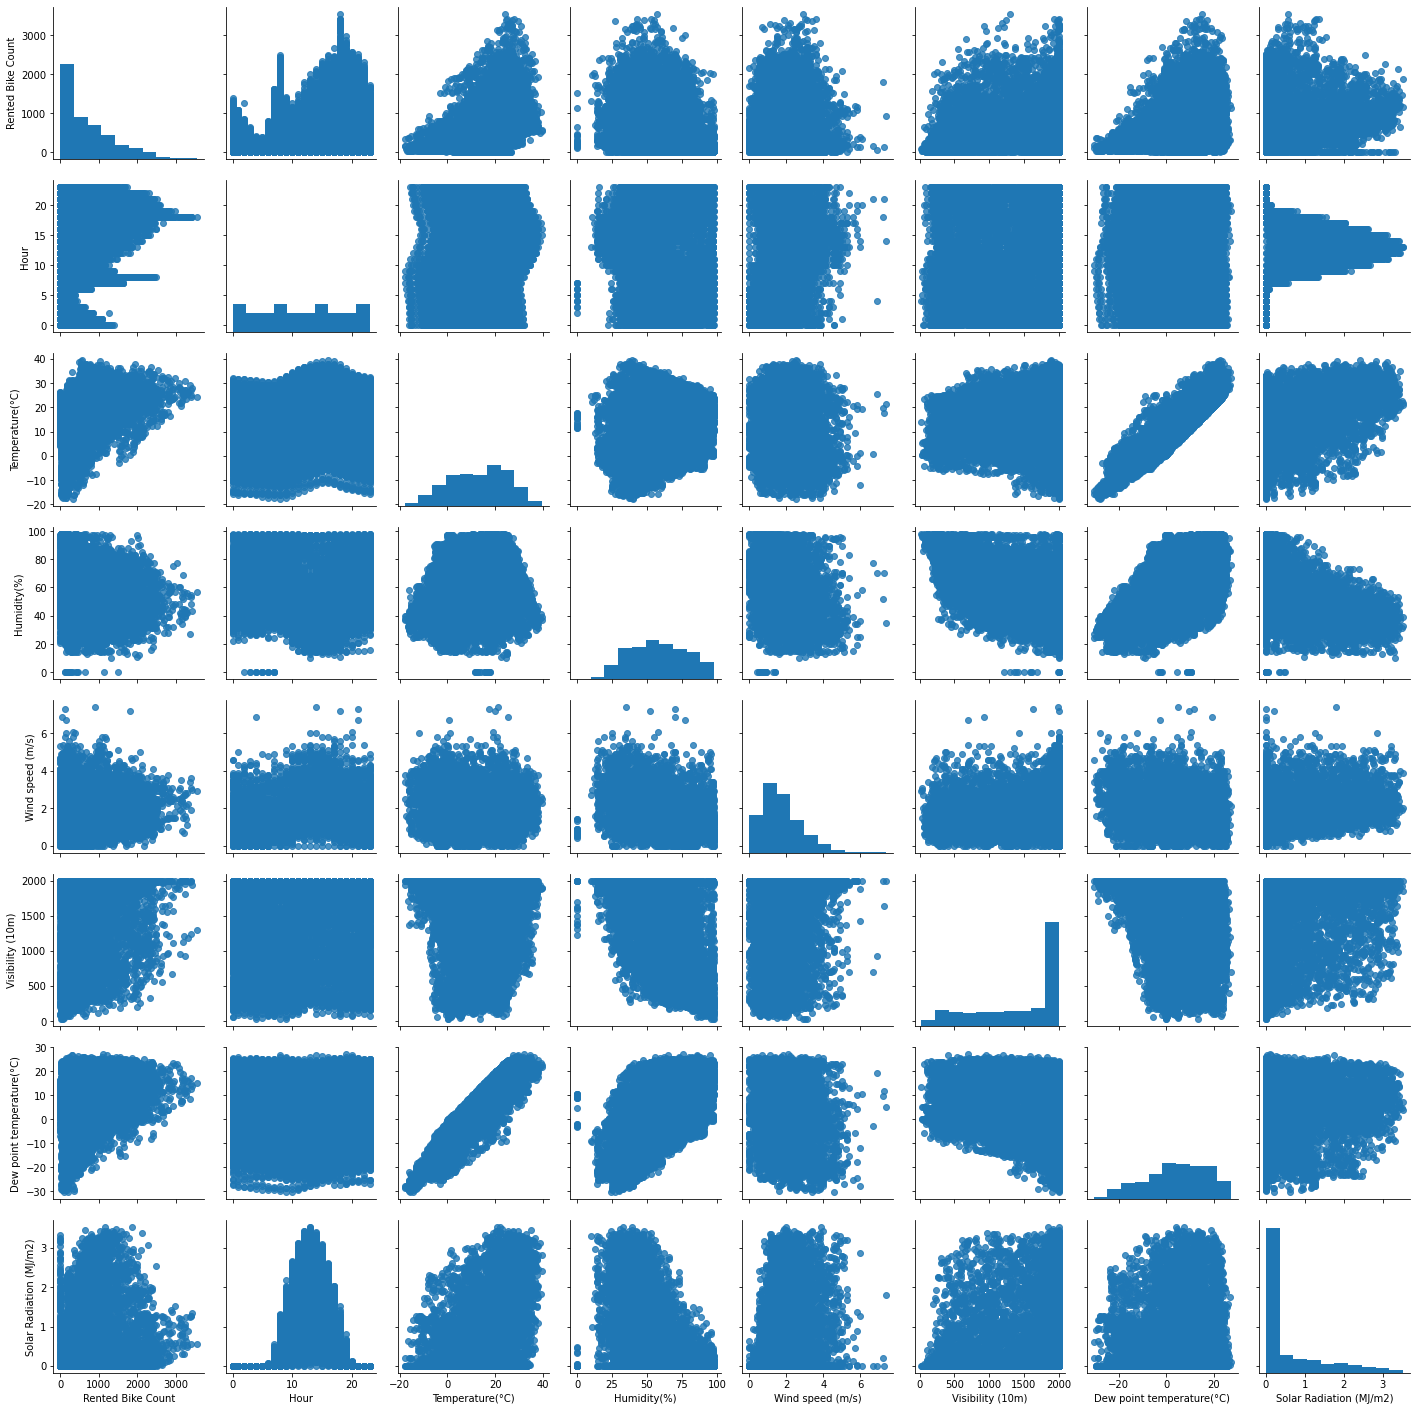

In [ ]:
#pairplot for numerical features for frequency distribution
g = sns.PairGrid(num_col)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 0.8)

## *** Feature Engineering & Data Pre-processing***

**Looking for outliers**

In [ ]:
#looking for outliers
plt.figure(figsize=(20,18))
for index, i in enumerate(num_col):
  plt.subplot(6,5,index+1)
  sns.boxplot(data=df,x=i)

*  We see outliers in five features so dealing with the outliers is necessary to get the most accurate prediction.

*  Deleting the features rainfall and snowfall which has maximum outliers to preventing affecting the functionality of the prediction.
*  Replacing the outlier values by nearest quantile values to reduce outliers

In [ ]:
#Replacing the outlier values by nearest quantile values to reduce outliers
max_val = df['Wind speed (m/s)'].quantile(0.95)
df['Wind speed (m/s)'] = np.where(df['Wind speed (m/s)']>max_val,max_val,df['Wind speed (m/s)'])

max_val = df['Solar Radiation (MJ/m2)'].quantile(0.95)
df['Solar Radiation (MJ/m2)'] = np.where(df['Solar Radiation (MJ/m2)']>max_val,max_val,df['Solar Radiation (MJ/m2)'])

max_val = df['Rented Bike Count'].quantile(0.95)
df['Rented Bike Count'] = np.where(df['Rented Bike Count']>max_val,max_val,df['Rented Bike Count'])


In [ ]:
#dropping columns rainfall and snowfall as it has maximum outliers
df.drop(['Rainfall(mm)','Snowfall (cm)'],axis=1,inplace=True)

In [ ]:
#plotting heat map to find out strengnth between the variables
plt.figure(figsize=(14,12))
sns.heatmap(round(df.corr(),2),cmap='Greens',annot=True)



*   Here we have multicollinearity between the features Temperature and dew temperature which is highly corelated by 0.91 which weakens the statistical power of our model. So we need to drop a column to reduce multicollinearity.




In [ ]:
#dropping dew point temperature to reduce multicollinearity
df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)

In [ ]:
#Multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
#VIF of all the features with respect to each other
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

In [ ]:
#plotting the scatter plot to the value flow 
df.plot.scatter(x='Temperature(°C)',y='Rented Bike Count',s=100)

In [ ]:
#creating a variable of all the categorical features
categorical_col=['Seasons','Holiday','Functioning Day']

In [ ]:
#encoding all the categorical features with dummies
df = pd.get_dummies(df, columns = categorical_col)

In [ ]:
df.head()

In [ ]:
#defining a numerical feature column 
numeric_features=df.drop(['Rented Bike Count'],axis=1).columns.tolist()

In [ ]:
numeric_features

In [ ]:
#creating correation plot for rented bike count with all the features
for col in numeric_features:
  fig=plt.figure(figsize=(10,7))
  ax = fig.gca()
  feature=df[col]
  label=df['Rented Bike Count']
  relation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Rented bike count')
  ax.set_title('Rented bike count ' + col + '- correlation: ' + str(relation))
  z = np.polyfit(feature, label, 1)
  y_hat = np.poly1d(z)(feature)
  plt.plot(feature, y_hat, "r--", lw=1)

plt.show()


These Linear plots shows that some features are positive and and some are negative in relation to target variable

In [ ]:
#plotting distplot of rented bike count to see its distribution
sns.distplot(df['Rented Bike Count'])

In [ ]:
#applying square root to change it to normal distribution 
sns.distplot(np.sqrt(df['Rented Bike Count']))

# Machine learning

In [ ]:
#defing data for test train
x=df.drop(['Rented Bike Count'],axis=1)
y=df['Rented Bike Count']

# Data Splitting and Data Scaling

In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#scaling
scalar=StandardScaler()
scale=scalar.fit(x_train)
x_train=scale.transform(x_train)
x_test=scale.transform(x_test)


Various metrics and algorithms are used to determine which independent variable to use. For this regression sample I selected models with highest R Squared and Adjusted R squared values. 

We will be comparing these models:

* Linear Regression
*  Lasso Regression 
* Ridge Regression 
* Decision Tree 
* Random Forest 
* KNN
* SVM

# Linear Regression

In [ ]:
#defing varible for linear regression
model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
print('coefficient:',model.coef_)
print('intercept:',model.intercept_)

In [ ]:
#predicting values from the test set
y_pred=model.predict(x_test)

In [ ]:
#plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [ ]:
#function to find adjusted r2
def adj_r2(x,y):
  r2=r2_score(x,y)
  n=x_test.shape[0]
  p=x_test.shape[1]
  adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

In [ ]:
print('R2 score:',r2_score(y_test,y_pred))
print('Adjusted R2 score:',adj_r2(y_test,y_pred))

# Hyper parameter tuning and cross validation for linear regression using Lasso and Ridge regularization 

# Lasso Regression

Finding the best parameter alpha from cross validation

In [ ]:
#defining a variable for lasso model
lasso=LassoCV(alphas=None,cv=5,max_iter=20000,normalize=True)
lasso.fit(x_train,y_train)

In [ ]:
#getting the best value alpha after cross validation
lasso.alpha_

Fitting the model again after getting the best parameters

In [ ]:
#fitting the train and test data
lasso=Lasso(alpha=0.00413)
lasso.fit(x_train,y_train)

#predicting value from the model
y_pred=lasso.predict(x_test)

In [ ]:
#plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [ ]:
#printing the r2 and adjusted r2 values
print('R2 score:',r2_score(y_test,y_pred))
print('Adjusted R2 score:',adj_r2(y_test,y_pred))

In [ ]:
#best score from cross validation
scores=cross_val_score(lasso,x_train,y_train,cv=5)
print('cross validation score=',np.mean(scores))

# Ridge regression

Finding the best alpha parameter by cross validating ridge regression

In [ ]:
#defing the variable for ridgecv model to get the best parameters
ridgecv=RidgeCV(alphas=np.random.uniform(0,10,50),cv=5,normalize=True)
ridgecv.fit(x_train,y_train)


In [ ]:
#getting the best value alpha after cross validation
ridgecv.alpha_

Fitting the model again after getting the best parameters

In [ ]:
#fitting the train and test data
ridge=Ridge(alpha=ridgecv.alpha_)
ridge.fit(x_train,y_train)

#predicting value from the model
y_pred=ridge.predict(x_test)

In [ ]:
#plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [ ]:
#printing the r2 and adjusted r2 values
print('R2 score:',r2_score(y_test,y_pred))
print('Adjusted R2 score:',adj_r2(y_test,y_pred))

In [ ]:
#best score from cross validation
scores=cross_val_score(lasso,x_train,y_train,cv=3)
print('cross validation score=',np.mean(scores))

# Decision tree

In [ ]:
#defining variable for decision tree regressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

#predicting values from the x_test from the model
y_pred = regressor.predict(x_test)


In [ ]:
#plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [ ]:
print('Rsquare: ',r2_score(y_pred,y_test))
print('adjusted_Rsquare: ',adj_r2(y_pred,y_test))

In [ ]:
regressor.feature_importances_


#  Hyperparameter tuning and cross validation on Decision Tree

In [ ]:
#parameters of decision tree ro be considered
param={'max_depth':[3,5,7,9,11],
       'min_samples_split':[10,20,40],
       'min_samples_leaf':[5,10,20,50],
       'max_leaf_nodes':[20,40,80,100]
       }
#finding the best parameters by gridsearchcv
cv_model=GridSearchCV(regressor,param_grid=param,cv=3,verbose=3)

#fitting training dataset to the model
cv_model.fit(x_train,y_train)

In [ ]:
#predicting the values
y_pred= cv_model.best_estimator_.predict(x_test)

In [ ]:
 #plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [ ]:
print('R square score=',cv_model.best_score_)

In [ ]:
print('Best parameters are:',cv_model.best_params_)

In [ ]:
#finding the best cross validation score
scores=cross_val_score(cv_model,x_train,y_train,cv=3)

In [ ]:
print('cross validation score=',np.mean(scores))

# Random forest regression

In [ ]:
#defining a variable for random forest
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

#predicting values from the model
y_pred=rf.predict(x_test)

In [ ]:
#plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [ ]:
print('Rsquare: ',r2_score(y_pred,y_test))
print('adjusted_Rsquare: ',adj_r2(y_pred,y_test))

# Hyper parameter tuning and Cross validation on Random forest

In [ ]:
#parameters of decision tree ro be considered
param={'max_depth':[5,7,9,11],
       'min_samples_split':[10,20,40],
       'min_samples_leaf':[10,20],
       #'max_leaf_nodes':[20,40,80],
       'n_estimators':[100,200,300]
         }
#finding the best parameters by gridsearchcv
cv_model=GridSearchCV(rf,param_grid=param,cv=3,verbose=3)
cv_model.fit(x_train,y_train)         

In [ ]:
print('R square score=',cv_model.best_score_)
print('Best parameters are:',cv_model.best_params_)

In [ ]:
#best score from cross validation
scores=cross_val_score(cv_model,x_train,y_train,cv=2)
print('cross validation score=',np.mean(scores))




# Support Vector Machines

In [ ]:
#defining a variable for random forest
svm= SVR(kernel='rbf')
svm.fit(x_train,y_train)
#predicting values from the modelS
y_pred=svm.predict(x_test)

In [ ]:
#plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [ ]:
print('Rsquare: ',r2_score(y_pred,y_test))
print('adjusted_Rsquare: ',adj_r2(y_pred,y_test))

* SVM is not a suitable model to get the best prediction as it has very Low R square score.

# KNN

In [ ]:
#calling Kneighbors variable and fitting it
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
#predicting values from the train test
y_pred=knn.predict(x_test)

In [ ]:
#plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [ ]:
print('Rsquare: ',r2_score(y_pred,y_test))
print('adjusted_Rsquare: ',adj_r2(y_pred,y_test))

# Cross validating and hyperparameter tuning KNN

In [ ]:
#getting the best parameters by gridsearchcv and fitting to the model
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn,param_grid=param_dict)
knn_grid.fit(x_train,y_train)

In [ ]:
print('R square score=',knn_grid.best_score_)
print('Best parameters are:',knn_grid.best_params_)

In [ ]:
#best score from cross validation
scores=cross_val_score(knn_grid,x_train,y_train,cv=2)
print('cross validation score=',np.mean(scores))

# Conclusion

* Most of the bikes is rented in summer and lowest in winter. 
* There are no rentals during non functioning days. 
* The use of rental bikes is extremely low when there is a holiday. 
* 2018 bike rentals constitutes 97% of the total rentals.
* In 2018 June month has highest bike rentals and December has least rentals and In 2017 December month has highest bike rentals. 
* From 6 pm to 9 pm there is huge demand for bike rentals. 
* Random forest is the best performing model with R square score of 0.8449 followed by decision tree regression model. 
* SVM is the least performing model with R square score of -4.11. Lasso and Ridge regression is not suitable to get the best score.
* The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count